## IMPORT LIBRARIES

In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')#filters the  warnings
import sklearn
from sklearn.metrics import accuracy_score

## IMPORT DATASET

In [90]:
# Summary of Weather data
data = pd.read_csv('Summary of Weather.csv')

In [91]:
# NaN values are present
data

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
data.shape

(119040, 31)

In [93]:
#Displays 1st 5 rows values for each column
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#Know your data
data.info

<bound method DataFrame.info of           STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889        0        

In [95]:
#statistical information about data
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


## CHECKING % of NaN VALUES IN DATASET

In [96]:
#checking missing values
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

## CLEANING DATA 

In [97]:
data.isnull().sum()/data.shape[0]*100

STA              0.000000
Date             0.000000
Precip           0.000000
WindGustSpd     99.553091
MaxTemp          0.000000
MinTemp          0.000000
MeanTemp         0.000000
Snowfall         0.976983
PoorWeather     71.239079
YR               0.000000
MO               0.000000
DA               0.000000
PRCP             1.622984
DR              99.552251
SPD             99.553091
MAX              0.398185
MIN              0.393145
MEA              0.418347
SNF              0.976983
SND             95.326781
FT             100.000000
FB             100.000000
FTI            100.000000
ITH            100.000000
PGT             99.558972
TSHDSBRSGF      71.239079
SD3            100.000000
RHX            100.000000
RHN            100.000000
RVG            100.000000
WTE            100.000000
dtype: float64

In [98]:
#Check if that column's null percentage is below 70

cols = [col for col in data.columns if (data[col].isnull().sum()/data.shape[0] * 100 < 70)]
data_set = data[cols]

print ('Legitimate columns after dropping null columns: %s' % data_set.shape[1])

Legitimate columns after dropping null columns: 15


In [99]:
data_set.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [100]:
data_set.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


In [101]:
#Label Encoding
data_set['Snowfall'] = pd.to_numeric(data_set['Snowfall'], errors='coerce')
data_set['SNF'] = pd.to_numeric(data_set['SNF'], errors='coerce')
data_set['PRCP'] = pd.to_numeric(data_set['PRCP'], errors='coerce')
data_set['Precip'] = pd.to_numeric(data_set['Precip'], errors='coerce')

data_set['Date'] = pd.to_datetime(data_set['Date'])

In [102]:
#Filling remaining null values using ffill

data_set.fillna(method='ffill', inplace=True)
data_set.fillna(method='bfill', inplace=True)

data_set.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
PRCP        0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

In [103]:
X = data_set.iloc[:, 4].values
y = data_set.iloc[:, 3].values
X

array([22.22222222, 21.66666667, 22.22222222, ..., 18.33333333,
       18.33333333, 17.22222222])

In [104]:
y

array([25.55555556, 28.88888889, 26.11111111, ..., 28.33333333,
       28.33333333, 29.44444444])

In [105]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape

(119040, 1)

In [106]:
y.shape

(119040, 1)

# TRAINING AND TESTING DATA

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
X_train.shape

(95232, 1)

In [109]:
y_train.shape

(95232, 1)

In [110]:
X_test.shape

(23808, 1)

In [111]:
y_test.shape

(23808, 1)

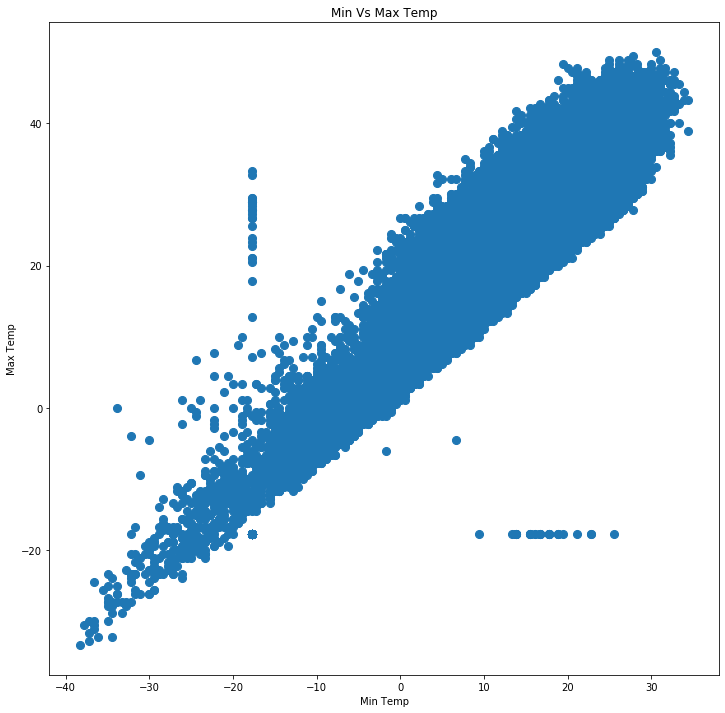

In [112]:
#Scatter diagram
plt.rcParams['figure.figsize']=[12,12]
plt.scatter(X,y,s=65)
plt.xlabel('Min Temp')
plt.ylabel('Max Temp')
plt.title('Min Vs Max Temp')
plt.show()

# 1.LINEAR REGRESSION

In [113]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr=Lr.fit(X_train, y_train)

In [114]:
ypr= Lr.predict(X_test)


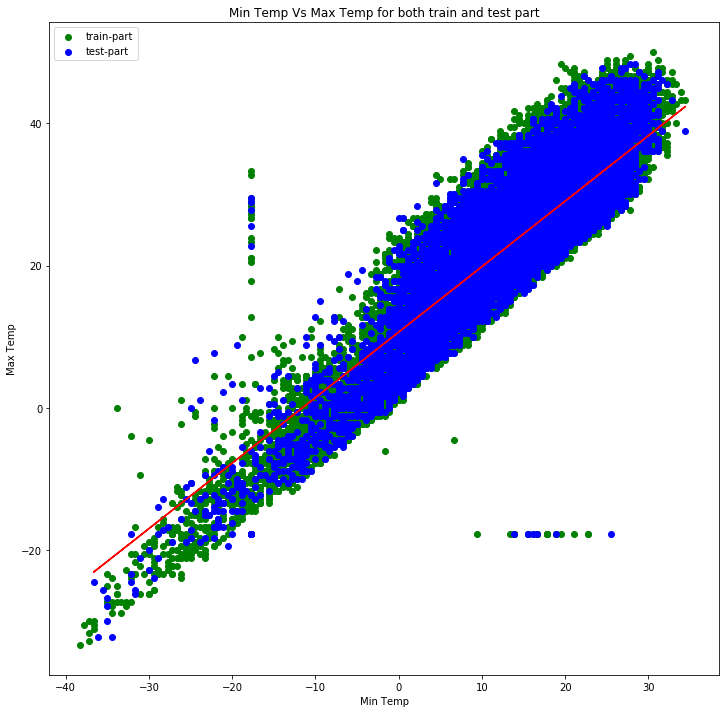

In [115]:
plt.scatter(X_train,y_train,c='green',label='train-part')
plt.scatter(X_test,y_test,c='blue',label='test-part')
plt.plot(X_test,Lr.predict(X_test),c='red')
plt.xlabel("Min Temp")
plt.ylabel("Max Temp")
plt.legend()
plt.title("Min Temp Vs Max Temp for both train and test part")
plt.show()

In [116]:
#print("Accuracy : ",accuracy_score(y_test, ypr.round())*100)
a =Lr.coef_        
c =Lr.intercept_
print("y = ",c ," + ",a," x  ")
#intercept and coefficient of linear model

y =  [10.66185201]  +  [[0.92033997]]  x  


In [117]:
# If r2_score is very close to 1 then prediction is good.
from sklearn.metrics import r2_score
r2 =r2_score(y_test,ypr)
print("R_square value of linear regression model is ",r2*100)
R_square={}
R_square["Linear Regression R_Square Score:"]=r2*100

R_square value of linear regression model is  76.70218843587764


###  Predict maximum temperature by giving minimum temperature

In [118]:
min_temp =[[17]]
y_pr = Lr.predict(min_temp).flatten()[0]
print("max temp = ",y_pr,"for given min temp",min_temp)

max temp =  26.307631436737793 for given min temp [[17]]


# 2.MULTIPLE LINEAR REGRESSION

In [119]:
model_multiple_linear_regression = LinearRegression()
model_multiple_linear_regression = model_multiple_linear_regression.fit(X,y)
model_multiple_linear_regression.intercept_       
model_multiple_linear_regression.coef_ 

array([[0.91877423]])

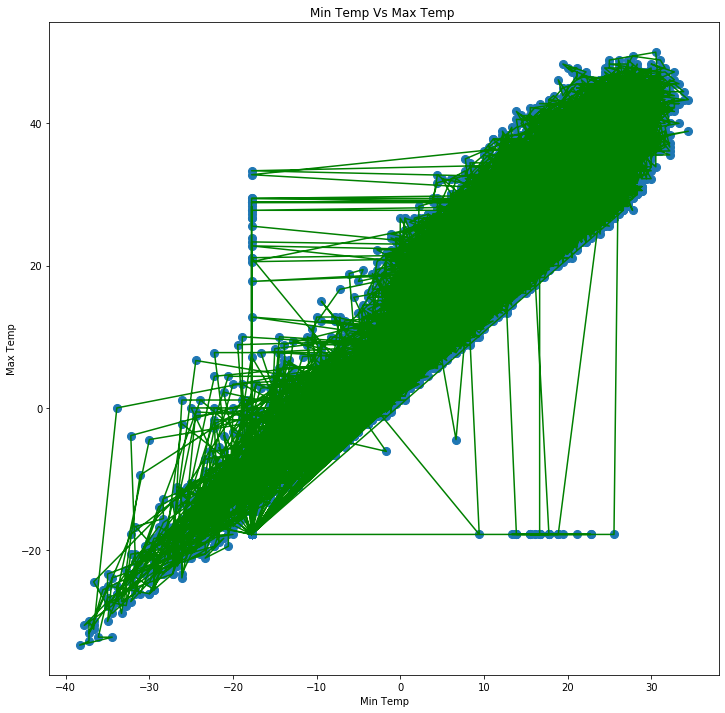

In [120]:
import operator
plt.scatter(X, y, s=65)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X, y, color='g')
plt.xlabel("Min Temp")
plt.ylabel("Max Temp")
plt.title("Min Temp Vs Max Temp ")
plt.show()

# 3.POLYNOMIAL REGRESSION MODEL

In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_model = PolynomialFeatures(degree = 3)
X_poly = poly_reg_model.fit_transform(X)
poly_reg_model.fit(X_poly, y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [122]:
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

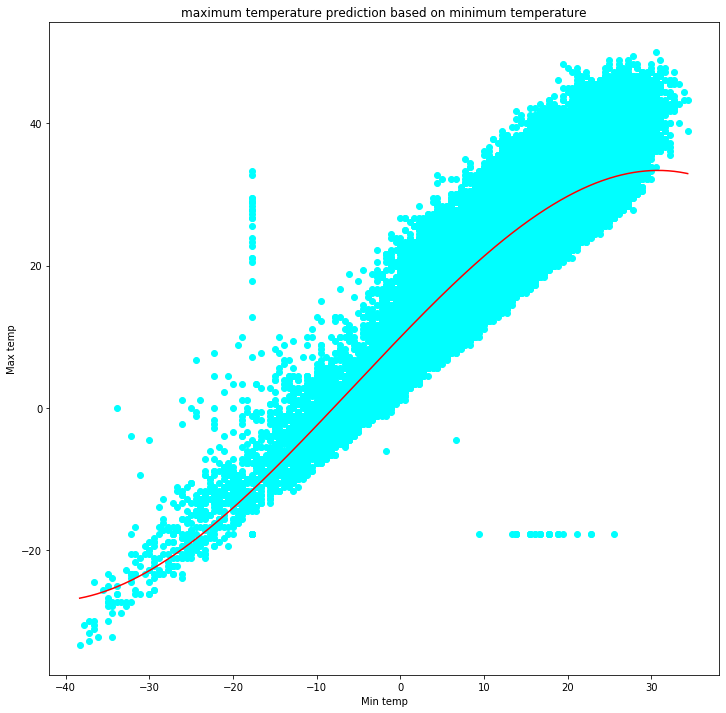

In [123]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'cyan')
plt.plot(X_grid, lin_reg_2.predict(poly_reg_model.fit_transform(X_grid)), color = 'red')
plt.title('maximum temperature prediction based on minimum temperature')
plt.xlabel('Min temp')
plt.ylabel('Max temp')
plt.show()

In [124]:
Max_head_pol=lin_reg_2.predict(X_poly)
pol_r2=sklearn.metrics.r2_score(y,Max_head_pol)
print("Polynomial Regression R_Square Score: " ,pol_r2*100)
R_square["Polynomial Regression R_Square Score:"]=pol_r2*100

Polynomial Regression R_Square Score:  79.49810061929902


###  Predict maximum temperature by giving minimum temperature

In [125]:
min_temp =[[17]]
pr_value = lin_reg_2.predict(poly_reg.fit_transform(min_temp)).flatten()[0]
print("max temp = ",pr_value,"for given min temp",min_temp)

max temp =  27.637157417187304 for given min temp [[17]]


# 4. DECISION TREE

In [126]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()      
decision_tree_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [127]:
Max_head=decision_tree_model.predict(X)

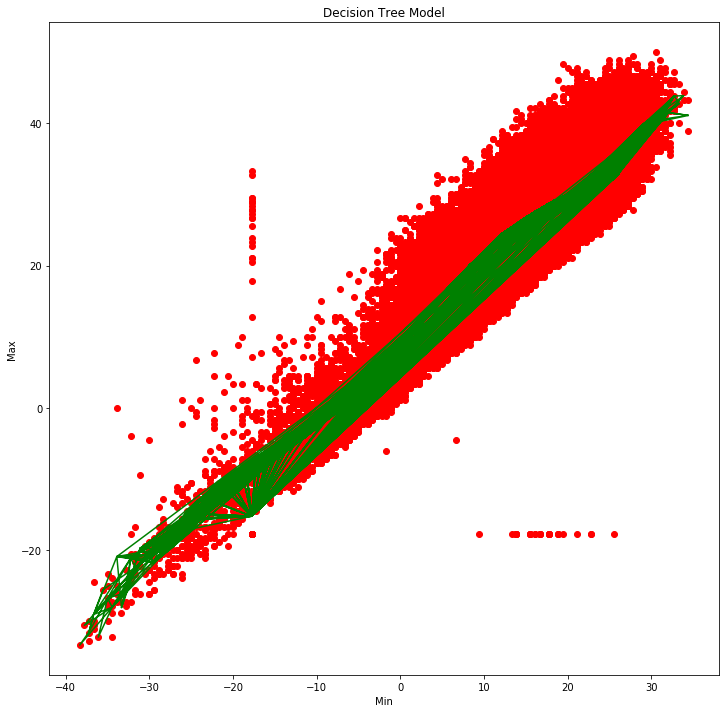

In [128]:
plt.scatter(X,y, color="red")                         
plt.plot(X,Max_head,color="green")
plt.xlabel("Min")
plt.ylabel("Max")
plt.title("Decision Tree Model")
plt.show()

In [129]:
Max_head_dt=decision_tree_model.predict(X)
dt_r2=r2_score(y,Max_head_dt)
print("Decision Tree Regression R_Square Score: " ,dt_r2*100)
R_square["Decision Tree Regression R_Square Score:"]=dt_r2*100

Decision Tree Regression R_Square Score:  80.69203915282833


###  Predict maximum temperature by giving minimum temperature

In [130]:
min_temp =[[17]]
dt_pr_value = decision_tree_model.predict(min_temp).flatten()[0]
print("max temp = ",dt_pr_value,"for given min temp",min_temp)

max temp =  28.32712022376517 for given min temp [[17]]


# 5. RANDOM FOREST

In [131]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model=RandomForestRegressor(n_estimators=100,random_state=42)
random_forest_model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [132]:
Tmp_head=random_forest_model.predict(X)

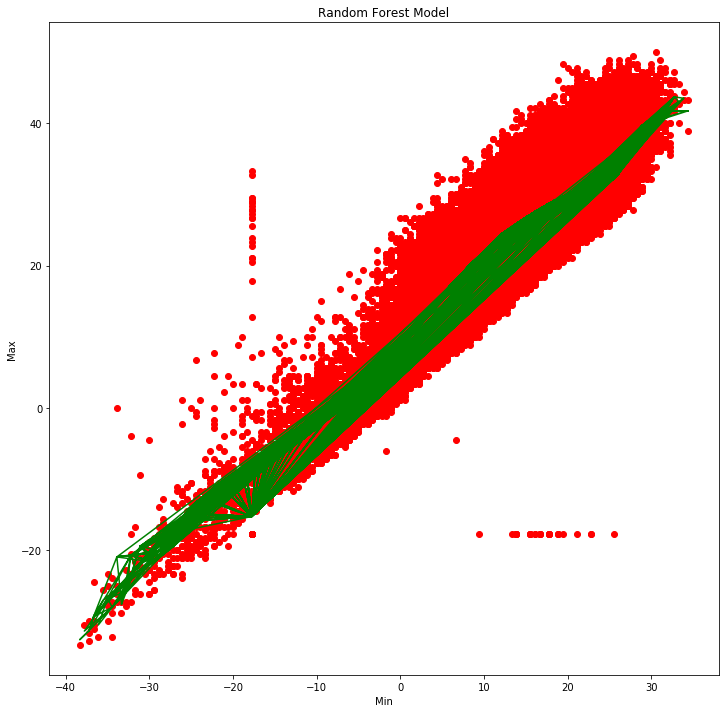

In [133]:
plt.scatter(X,y,color="red")
plt.plot(X,Tmp_head,color="green")
plt.xlabel("Min")
plt.ylabel("Max")
plt.title("Random Forest Model")
plt.show()

In [134]:
Max_head_rf=random_forest_model.predict(X)
rf_r2=r2_score(y,Max_head_rf)
print("Random Forest Regression R_Square Score: " ,rf_r2*100)
R_square["Random Forest Regression R_Square Score:"]=rf_r2*100

Random Forest Regression R_Square Score:  80.69168312638763


###  Predict maximum temperature by giving minimum temperature

In [135]:
min_temp =[[17]]
rf_pr_value = random_forest_model.predict(min_temp).flatten()[0]
print("max temp = ",rf_pr_value,"for given min temp",min_temp)

max temp =  28.342987220931395 for given min temp [[17]]


In [136]:
R_square

{'Linear Regression R_Square Score:': 76.70218843587764,
 'Polynomial Regression R_Square Score:': 79.49810061929902,
 'Decision Tree Regression R_Square Score:': 80.69203915282833,
 'Random Forest Regression R_Square Score:': 80.69168312638763}

## THERE IS A LINEAR RELATIONSHIP BETWEEN MINIMUM AND MAXIMUM TEMPERATURES